In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [16]:
df = pd.read_pickle("car_data_dummy.pkl")

In [17]:
df.shape

(15915, 144)

In [18]:
df.head()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,...,body_color_Violet,body_color_White,body_color_Yellow,upholstery_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.0,2.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,14500,80000.0,1.0,0,3,4,7.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14640,83450.0,1.0,0,4,4,6.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,14500,73000.0,1.0,0,3,4,6.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
4,16790,16200.0,1.0,1,5,5,6.0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

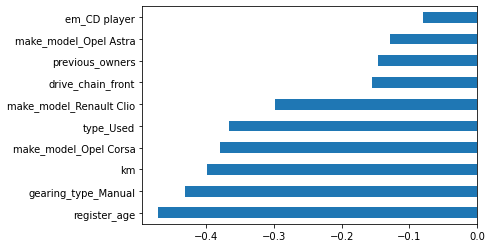

In [22]:
df.corr()["price"].sort_values().head(10).plot.barh()

<AxesSubplot:>

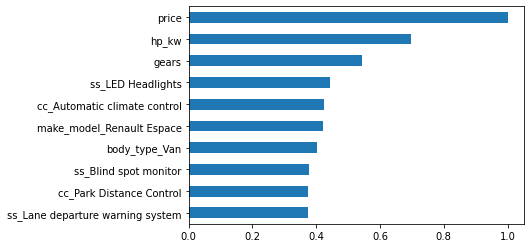

In [23]:
df.corr()["price"].sort_values().tail(10).plot.barh()

<AxesSubplot:xlabel='price', ylabel='Count'>

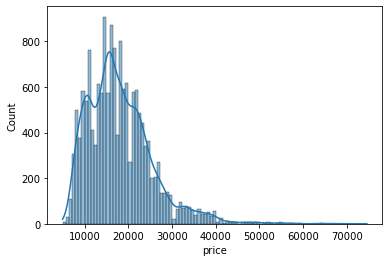

In [29]:
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price'>

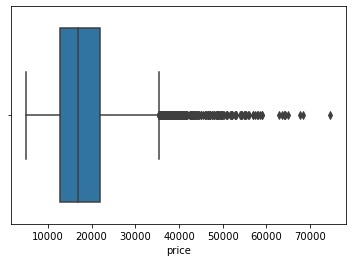

In [30]:
sns.boxplot(x=df.price)

In [31]:
X = df.drop("price", axis=1)
y = df.price

In [32]:
X.shape

(15915, 143)

In [33]:
y.shape

(15915,)

In [36]:
df.isnull().any().sum()

0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [39]:
# Linear Regression

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
lm.intercept_

16853.162074167867

In [44]:
lm.coef_

array([-3.98454744e-02, -3.90657395e+01, -2.57589844e+02,  4.13964573e+02,
       -5.09479026e+01,  5.08793889e+02, -1.21616486e+02, -1.18862892e+02,
        7.42216739e+01,  2.49152147e+02, -3.75136303e+02,  2.14282599e+02,
       -1.54623863e+03,  1.18224103e+01,  1.43119658e+02,  9.06158155e+01,
        3.66644762e+02,  2.37562382e+03,  3.46022279e+02,  2.00723376e+02,
        1.51422682e+02, -2.61353367e+02,  2.19751859e+02,  8.28819486e+01,
       -4.19232156e+02,  4.55545996e+02,  6.48291379e+01,  3.79821305e+02,
       -2.23380620e+02,  6.52755671e+02,  7.62149054e+01,  1.01814527e+03,
        2.59743010e+02, -4.73703227e+02,  9.51944368e+01, -1.97214175e+02,
        5.35726391e+01,  7.98480532e+02, -2.23561624e+02, -3.39673283e+01,
        7.21934026e+02,  6.77636268e+00, -7.45575308e+02, -1.65169605e+01,
       -5.07796027e+02,  4.32150502e+01,  8.07611979e+02,  6.30997658e+01,
       -1.95948515e+02, -1.19586004e+01,  2.17006211e+02, -1.78931315e+02,
       -1.56484783e+03, -

In [45]:
y_pred = lm.predict(X_test)

In [46]:
eval_metrics(y_test, y_pred)

r2_score: 0.8911819282388025 
 mae: 1724.4861527162286 
 mse: 5872648.048024018 
 rmse: 2423.3547094934365


In [59]:
r2 = np.sqrt(mean_squared_error(y_test, y_pred))

In [60]:
p = X.shape[1]

In [61]:
n = X_test.shape[0]

In [62]:
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [63]:
adj_r2

2537.338494770686

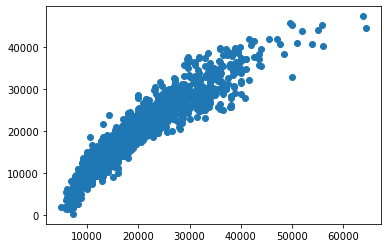

In [64]:
plt.scatter(y_test, y_pred)

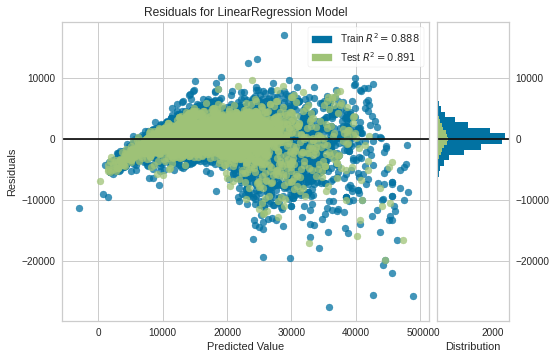

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [67]:
my_dict = {"Actual": y_test, "Pred": y_pred}

In [68]:
compare = pd.DataFrame(my_dict)

In [69]:
compare.head(10)

,Actual,Pred
12887,26379,24518.018502
8140,18990,18880.749499
6835,12490,12261.138081
15439,32975,35358.639685
1213,15888,14969.701488
13187,15480,15136.610661
1034,20500,22446.017913
2864,16760,16049.883881
7061,18990,17496.062762
14983,27000,25032.312157


In [70]:
# Cross-Validation

In [76]:
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)

In [77]:
cv_scores.mean()

0.8835560647890656

In [78]:
# Ridge Regression

In [80]:
ridge_model = Ridge(normalize=True)

In [81]:
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [82]:
y_pred = ridge_model.predict(X_test)

In [83]:
eval_metrics(y_test, y_pred)

r2_score: 0.826594021345416 
 mae: 2128.4531254597186 
 mse: 9358301.112854883 
 rmse: 3059.1340462383932


In [84]:
alpha_space = np.linspace(0.1, 20, 1000)

In [85]:
ridgecv = RidgeCV(alphas=alpha_space, normalize=True, cv=10)

In [86]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.11991992,  0.13983984,  0.15975976,  0.17967968,
        0.1995996 ,  0.21951952,  0.23943944,  0.25935936,  0.27927928,
        0.2991992 ,  0.31911912,  0.33903904,  0.35895896,  0.37887888,
        0.3987988 ,  0.41871872,  0.43863864,  0.45855856,  0.47847848,
        0.4983984 ,  0.51831832,  0.53823824,  0.55815816,  0.57807808,
        0.597998  ,  0.61791792,  0.63783784,  0.65775776,  0.67767768,
        0.6975976 ,  0...
       19.42232232, 19.44224224, 19.46216216, 19.48208208, 19.502002  ,
       19.52192192, 19.54184184, 19.56176176, 19.58168168, 19.6016016 ,
       19.62152152, 19.64144144, 19.66136136, 19.68128128, 19.7012012 ,
       19.72112112, 19.74104104, 19.76096096, 19.78088088, 19.8008008 ,
       19.82072072, 19.84064064, 19.86056056, 19.88048048, 19.9004004 ,
       19.92032032, 19.94024024, 19.96016016, 19.98008008, 20.        ]),
        cv=10, normalize=True)

In [87]:
ridgecv.alpha_

0.1

In [88]:
ridge_model = Ridge(alpha=0.1, normalize=True)

In [89]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [91]:
y_pred = ridge_model.predict(X_test)

In [92]:
eval_metrics(y_test, y_pred)

r2_score: 0.8850256855768341 
 mae: 1755.9075590407215 
 mse: 6204885.569483782 
 rmse: 2490.9607723695253


In [93]:
# Lasso Regression

In [95]:
lasso_model = Lasso(normalize=True)

In [96]:
lasso_model.fit(X_train, y_train)

Lasso(normalize=True)

In [97]:
y_pred = lasso_model.predict(X_test)

In [98]:
eval_metrics(y_test, y_pred)

r2_score: 0.8811119597668843 
 mae: 1783.8119116527605 
 mse: 6416099.88220145 
 rmse: 2533.00214808465


In [100]:
lassocv = LassoCV(alphas = alpha_space, normalize=True, cv=10)

In [101]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.11991992,  0.13983984,  0.15975976,  0.17967968,
        0.1995996 ,  0.21951952,  0.23943944,  0.25935936,  0.27927928,
        0.2991992 ,  0.31911912,  0.33903904,  0.35895896,  0.37887888,
        0.3987988 ,  0.41871872,  0.43863864,  0.45855856,  0.47847848,
        0.4983984 ,  0.51831832,  0.53823824,  0.55815816,  0.57807808,
        0.597998  ,  0.61791792,  0.63783784,  0.65775776,  0.67767768,
        0.6975976 ,  0...
       19.42232232, 19.44224224, 19.46216216, 19.48208208, 19.502002  ,
       19.52192192, 19.54184184, 19.56176176, 19.58168168, 19.6016016 ,
       19.62152152, 19.64144144, 19.66136136, 19.68128128, 19.7012012 ,
       19.72112112, 19.74104104, 19.76096096, 19.78088088, 19.8008008 ,
       19.82072072, 19.84064064, 19.86056056, 19.88048048, 19.9004004 ,
       19.92032032, 19.94024024, 19.96016016, 19.98008008, 20.        ]),
        cv=10, normalize=True)

In [102]:
lassocv.alpha_

0.1

In [103]:
lasso_model = Lasso(alpha=0.1, normalize=True)

In [104]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, normalize=True)

In [105]:
y_pred = lasso_model.predict(X_test)

In [106]:
eval_metrics(y_test, y_pred)

r2_score: 0.8910341654854181 
 mae: 1721.8057428554287 
 mse: 5880622.446312729 
 rmse: 2424.999473466485


In [107]:
# Higher alpha values will result in more features to be eliminated.

In [109]:
# Ridge will never completely eliminate a feature but lasso can, depending on the alpha value.

In [110]:
# We can use lasso for feature selection but we can't use it to compare importance of features based on the coefficients lasso determines.

In [111]:
# Random Forest Regressor

In [113]:
rf_reg = RandomForestRegressor()

In [114]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
y_pred = rf_reg.predict(X_test)

In [116]:
eval_metrics(y_test, y_pred)

r2_score: 0.9584616427756208 
 mae: 846.4478259903174 
 mse: 2241724.63749591 
 rmse: 1497.2390048004727


In [119]:
# Random Forest Regressor performed much better than linear models.

In [118]:
cv_scores = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=10)

In [120]:
cv_scores.mean()

0.9518115609579404

In [121]:
# Random Forest Feature Importance

In [122]:
rf_reg.feature_importances_

array([6.48432105e-02, 1.24671075e-03, 6.26613608e-04, 8.27859409e-04,
       9.76474210e-04, 1.47059037e-02, 2.74976227e-04, 4.09859487e-05,
       8.61468880e-04, 1.81577606e-03, 1.69953182e-04, 4.77609371e-04,
       3.44521685e-07, 1.85461922e-03, 4.48189907e-04, 1.90112701e-03,
       3.37745427e-04, 3.21303312e-03, 8.63038273e-04, 2.26824473e-03,
       5.89057357e-04, 4.28340356e-05, 4.23231036e-04, 5.29607422e-04,
       5.06131662e-04, 4.24919418e-04, 5.62556708e-04, 6.53823299e-04,
       3.43822106e-04, 1.94045953e-03, 7.39206526e-04, 9.34198875e-04,
       4.90938172e-04, 7.00127210e-04, 2.93560066e-04, 4.28441355e-04,
       1.53667076e-03, 5.45438910e-04, 3.41047776e-04, 6.84602501e-04,
       5.45560607e-04, 2.00977961e-04, 1.09908984e-05, 1.11739726e-06,
       1.82923379e-03, 4.69937959e-04, 4.20833330e-04, 6.36382405e-04,
       4.01781492e-04, 2.78941363e-04, 7.09501098e-04, 4.61457279e-04,
       1.01656775e-04, 6.90717373e-04, 5.93029144e-04, 4.09662635e-05,
      

In [123]:
importance = pd.DataFrame({"importance": rf_reg.feature_importances_},
                         index=X_train.columns)

In [125]:
importance.sort_values(by="importance", ascending=False).head()

,importance
hp_kw,0.488091
register_age,0.201791
km,0.064843
make_model_Renault Espace,0.060656
displacement_cc,0.017050


<AxesSubplot:>

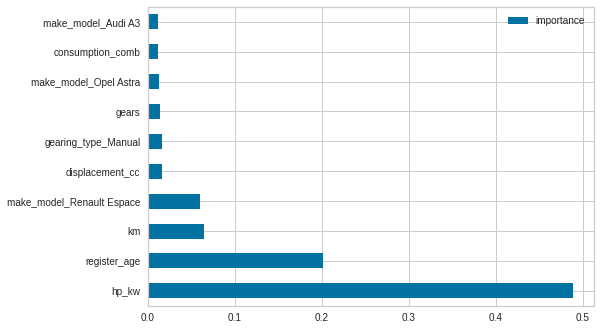

In [127]:
importance.sort_values(by="importance", ascending=False).head(10).plot.barh()

In [128]:
# Model tuning for RF hyperparameters.

In [132]:
rf_params = {"n_estimators": [50, 100, 200, 300, 500, 700],
            "max_depth": [3, 5, 7],
            "max_features": [2, 4, 6, 8],
            "min_samples_split": [2, 4, 6]}

In [133]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv=10, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  9.9min finished


In [134]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 4,
 'n_estimators': 700}

In [152]:
rf_tuned = RandomForestRegressor(max_features=8,
                                min_samples_split=4,
                                n_estimators=700)

In [153]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=8, min_samples_split=4, n_estimators=700)

In [154]:
y_pred = rf_tuned.predict(X_test)

In [155]:
eval_metrics(y_test, y_pred)

r2_score: 0.9384286173841389 
 mae: 1067.2773327822724 
 mse: 3322858.5480423155 
 rmse: 1822.8709630805783


In [151]:
# Tuned Random Forest performed worse than the one with default hyperparameters.

In [156]:
cv_scores = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)

In [157]:
cv_scores.mean()

0.931558072792497

In [158]:
# Let's try XGBoost now.

In [162]:
model_xg = XGBRegressor()

In [163]:
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred = model_xg.predict(X_test)

In [165]:
eval_metrics(y_test, y_pred)

r2_score: 0.9598956346999711 
 mae: 926.945005234105 
 mse: 2164335.562876961 
 rmse: 1471.1680947046673


In [166]:
cv_scores = cross_val_score(estimator=model_xg, X=X_train, y=y_train, cv=10)

In [167]:
cv_scores.mean()

0.9534829450814557

In [168]:
# XGBoost with default hyperparameters performed slightly better than Random Forest Regression with default hyperparameters